In [1]:
%%time
import numpy as np
import pandas as pd
import warnings
warnings.filterwarnings('ignore')

CPU times: total: 891 ms
Wall time: 1.04 s


In [2]:
path = r'D:\Downloads'
file = r'US Elections 2024 Sentiment.csv'
sentiment_df = pd.read_csv(path + '\\' + file)
sentiment_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13871 entries, 0 to 13870
Data columns (total 21 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   id                         13871 non-null  int64  
 1   candidate                  13775 non-null  object 
 2   candidate_confidence       13871 non-null  float64
 3   relevant_yn                13871 non-null  object 
 4   relevant_yn_confidence     13871 non-null  float64
 5   sentiment                  13871 non-null  object 
 6   sentiment_confidence       13871 non-null  float64
 7   subject_matter             13545 non-null  object 
 8   subject_matter_confidence  13871 non-null  float64
 9   candidate_gold             28 non-null     object 
 10  name                       13871 non-null  object 
 11  relevant_yn_gold           32 non-null     object 
 12  retweet_count              13871 non-null  int64  
 13  sentiment_gold             15 non-null     obj

In [3]:
# Checking null values for every feature of the dataframe
sentiment_df.isna().sum()

id                               0
candidate                       96
candidate_confidence             0
relevant_yn                      0
relevant_yn_confidence           0
sentiment                        0
sentiment_confidence             0
subject_matter                 326
subject_matter_confidence        0
candidate_gold               13843
name                             0
relevant_yn_gold             13839
retweet_count                    0
sentiment_gold               13856
subject_matter_gold          13853
text                             0
tweet_coord                  13850
tweet_created                    0
tweet_id                         0
tweet_location                3912
user_timezone                 4403
dtype: int64

In [4]:
sentiment_df.head()

,id,candidate,candidate_confidence,relevant_yn,relevant_yn_confidence,sentiment,sentiment_confidence,subject_matter,subject_matter_confidence,candidate_gold,...,relevant_yn_gold,retweet_count,sentiment_gold,subject_matter_gold,text,tweet_coord,tweet_created,tweet_id,tweet_location,user_timezone
0,1,No candidate mentioned,1.0,yes,1.0,Neutral,0.6578,None of the above,1.0000,NaN,...,NaN,5,NaN,NaN,RT @NancyLeeGrahn: How did everyone feel about...,NaN,2015-08-07 09:54:46 -0700,629697200650592256,NaN,Quito
1,2,Scott Walker,1.0,yes,1.0,Positive,0.6333,None of the above,1.0000,NaN,...,NaN,26,NaN,NaN,RT @ScottWalker: Didn't catch the full #GOPdeb...,NaN,2015-08-07 09:54:46 -0700,629697199560069120,NaN,NaN
2,3,No candidate mentioned,1.0,yes,1.0,Neutral,0.6629,None of the above,0.6629,NaN,...,NaN,27,NaN,NaN,RT @TJMShow: No mention of Tamir Rice and the ...,NaN,2015-08-07 09:54:46 -0700,629697199312482304,NaN,NaN
3,4,No candidate mentioned,1.0,yes,1.0,Positive,1.0000,None of the above,0.7039,NaN,...,NaN,138,NaN,NaN,RT @RobGeorge: That Carly Fiorina is trending ...,NaN,2015-08-07 09:54:45 -0700,629697197118861312,Texas,Central Time (US & Canada)
4,5,Donald Trump,1.0,yes,1.0,Positive,0.7045,None of the above,1.0000,NaN,...,NaN,156,NaN,NaN,RT @DanScavino: #GOPDebate w/ @realDonaldTrump...,NaN,2015-08-07 09:54:45 -0700,629697196967903232,NaN,Arizona


In [5]:
sentiment_df.sample(5)

,id,candidate,candidate_confidence,relevant_yn,relevant_yn_confidence,sentiment,sentiment_confidence,subject_matter,subject_matter_confidence,candidate_gold,...,relevant_yn_gold,retweet_count,sentiment_gold,subject_matter_gold,text,tweet_coord,tweet_created,tweet_id,tweet_location,user_timezone
13758,13759,Ted Cruz,0.6552,yes,1.0000,Negative,0.6897,None of the above,0.6552,NaN,...,NaN,149,NaN,NaN,RT @RWSurferGirl: I think Cruz and Trump need ...,NaN,2015-08-06 18:57:21 -0700,629471359731650560,"Michigan, USA",Eastern Time (US & Canada)
13227,13228,Chris Christie,1.0000,yes,1.0000,Positive,1.0000,None of the above,1.0000,NaN,...,NaN,3,NaN,NaN,RT @loribuckmajor: It's cute how Chris Christi...,NaN,2015-08-06 19:08:13 -0700,629474091901194240,2:46 A.M. Rock & Roll,Central Time (US & Canada)
2268,2269,No candidate mentioned,0.6463,yes,1.0000,Positive,0.3537,None of the above,1.0000,NaN,...,NaN,0,NaN,NaN,Cracking up at @theskimm summary of the #GOPDe...,NaN,2015-08-07 09:32:29 -0700,629691593977540608,"Seattle, WA",Pacific Time (US & Canada)
6546,6547,Donald Trump,0.4090,yes,0.6396,Negative,0.6396,Immigration,0.4090,NaN,...,NaN,119,NaN,NaN,RT @JudgeJeanine: #GOPDebate @realDonaldTrump ...,NaN,2015-08-07 08:18:24 -0700,629672949646249984,NaN,Central Time (US & Canada)
3043,3044,No candidate mentioned,0.4522,yes,0.6724,Negative,0.6724,Abortion,0.4522,NaN,...,NaN,400,NaN,NaN,"RT @amaraconda: republicans always do that ""wh...",NaN,2015-08-07 09:23:46 -0700,629689397999333378,NaN,Central Time (US & Canada)


In [6]:
sentiment_df['candidate'].value_counts(dropna=False)

candidate
No candidate mentioned    7491
Donald Trump              2813
Jeb Bush                   705
Ted Cruz                   637
Ben Carson                 404
Mike Huckabee              393
Chris Christie             293
Marco Rubio                275
Rand Paul                  263
Scott Walker               259
John Kasich                242
NaN                         96
Name: count, dtype: int64

In [7]:
sentiment_df['sentiment'].value_counts()

sentiment
Negative    8493
Neutral     3142
Positive    2236
Name: count, dtype: int64

In [8]:
sentiment_text_df = sentiment_df[['sentiment','text']]
sentiment_text_df.isna().sum()

sentiment    0
text         0
dtype: int64

In [9]:
sentiment_text_df.sample()

,sentiment,text
13310,Negative,"Correct me if I'm wrong, but Scott Walker was ..."


In [10]:
%%time
# Removal Special Characters & Tokenization of text
import re

# text_alphanumeric = []
# for text in sentiment_text_df['text']:
#     text_alphanumeric.append(re.sub(r'[^a-zA-Z0-9 ]', '', text)) # Pick only alpha numeric characters from text
# sentiment_text_df['text_an'] = text_alphanumeric

sentiment_text_df['text_an'] = sentiment_text_df['text'].apply(lambda x: re.sub(r'[^a-zA-Z0-9 ]', '', x)) 
### 'text_an' = text alpha numeric
sentiment_text_df.sample()

CPU times: total: 62.5 ms
Wall time: 56.8 ms


,sentiment,text,text_an
6581,Negative,"Shame on them, they should have watched reruns...",Shame on them they should have watched reruns ...


In [11]:
%%time
from nltk.tokenize import word_tokenize

sentiment_text_df['text_an_tl'] = sentiment_text_df['text_an'].apply(lambda x: word_tokenize(x.lower())) 
### 'text_an_tl' = text alpha numeric tokens lowercase
sentiment_text_df.sample()

CPU times: total: 2.92 s
Wall time: 3.08 s


,sentiment,text,text_an,text_an_tl
5426,Negative,Great #GOPDebate - CAN WE TRUST YOU?\nU were f...,Great GOPDebate CAN WE TRUST YOUU were fired ...,"[great, gopdebate, can, we, trust, youu, were,..."


In [12]:
%%time
from nltk.corpus import stopwords

stop_words1 = set(stopwords.words('english')) #downloads the file with english stop words
def apply_stop_words(text_an_tl):
    return [w for w in text_an_tl if not w in stop_words1]

sentiment_text_df['text_an_tl_sw'] = sentiment_text_df['text_an_tl'].apply(lambda x: apply_stop_words(x))
### 'text_an_tl_sw' = text alpha numeric tokens lowercase stop words

pd.set_option('display.max_colwidth', None)
sentiment_text_df.sample().transpose()

CPU times: total: 31.2 ms
Wall time: 45.3 ms


,7783
sentiment,Negative
text,#GOPDebate Donald Trump hates Mexicans? http://t.co/dtmqyAJ56S
text_an,GOPDebate Donald Trump hates Mexicans httptcodtmqyAJ56S
text_an_tl,"[gopdebate, donald, trump, hates, mexicans, httptcodtmqyaj56s]"
text_an_tl_sw,"[gopdebate, donald, trump, hates, mexicans, httptcodtmqyaj56s]"


In [13]:
%%time
from nltk.stem import WordNetLemmatizer
lem = WordNetLemmatizer()

def apply_lemmatization(text_an_tl_sw):
    return [lem.lemmatize(word, pos = 'v') for word in text_an_tl_sw]

sentiment_text_df['text_an_tl_sw_lem'] = sentiment_text_df['text_an_tl_sw'].apply(lambda x: apply_lemmatization(x))
### 'text_an_tl_sw_lem' = text alpha numeric tokens lowercase stop words lemmatization

sentiment_text_df.sample().transpose()

CPU times: total: 2.47 s
Wall time: 2.5 s


,8292
sentiment,Neutral
text,RT @kimguilfoyle: Two great debates! Who were your favorites? Let me know your thoughts #GOPDebates #RoadTo2016
text_an,RT kimguilfoyle Two great debates Who were your favorites Let me know your thoughts GOPDebates RoadTo2016
text_an_tl,"[rt, kimguilfoyle, two, great, debates, who, were, your, favorites, let, me, know, your, thoughts, gopdebates, roadto2016]"
text_an_tl_sw,"[rt, kimguilfoyle, two, great, debates, favorites, let, know, thoughts, gopdebates, roadto2016]"
text_an_tl_sw_lem,"[rt, kimguilfoyle, two, great, debate, favorites, let, know, thoughts, gopdebates, roadto2016]"


### 4. Data Visualization for Sentiment Distribution

In [14]:
import matplotlib.pyplot as plt

sentiment_distribution_df = sentiment_text_df['sentiment'].value_counts().reset_index()
# sentiment_distribution_df['percent'] = round(sentiment_distribution_df['count']/sentiment_distribution_df['count'].sum() * 100, 2)
sentiment_distribution_df

,sentiment,count
0,Negative,8493
1,Neutral,3142
2,Positive,2236


In [15]:
# fig = plt.figure(figsize=(10, 7))plt.bar(sentiment_distribution_df['sentiment'], sentiment_distribution_df['count'])
# plt.title('Sentiment Distribution')
# plt.xlabel('Sentiment')
# plt.ylabel('Count')
# plt.show()

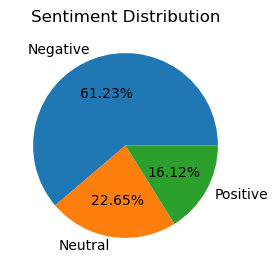

In [16]:
# Creating plot
fig = plt.figure(figsize=(8, 3))
plt.pie(x=sentiment_distribution_df['count'], labels=sentiment_distribution_df['sentiment'], autopct='%0.2f%%')

# show plot
plt.title('Sentiment Distribution')
plt.show()

### 5. World Cloud for positive and negative review separately

In [17]:
sentiment_text_df['text_an_tl_sw_lem_str'] = sentiment_text_df['text_an_tl_sw_lem'].apply(lambda x: ' '.join(x))
### Creating 'text_an_tl_sw_lem_str' = text alpha numeric tokens lowercase stop words lemmatization string
# This process was done to create a corpus of words (list -> str)
sentiment_text_df.sample(3)

,sentiment,text,text_an,text_an_tl,text_an_tl_sw,text_an_tl_sw_lem,text_an_tl_sw_lem_str
3658,Negative,"RT @chrissiefit: I don't understand what I'm watching. This is a run through for an SNL cold open, right? #GOPDebate",RT chrissiefit I dont understand what Im watching This is a run through for an SNL cold open right GOPDebate,"[rt, chrissiefit, i, dont, understand, what, im, watching, this, is, a, run, through, for, an, snl, cold, open, right, gopdebate]","[rt, chrissiefit, dont, understand, im, watching, run, snl, cold, open, right, gopdebate]","[rt, chrissiefit, dont, understand, im, watch, run, snl, cold, open, right, gopdebate]",rt chrissiefit dont understand im watch run snl cold open right gopdebate
6590,Neutral,"RT @GreatnessNYou: Opinions abound after last night's GOP Debate, but what America is starving for is authentic leadership and someone we c…",RT GreatnessNYou Opinions abound after last nights GOP Debate but what America is starving for is authentic leadership and someone we c,"[rt, greatnessnyou, opinions, abound, after, last, nights, gop, debate, but, what, america, is, starving, for, is, authentic, leadership, and, someone, we, c]","[rt, greatnessnyou, opinions, abound, last, nights, gop, debate, america, starving, authentic, leadership, someone, c]","[rt, greatnessnyou, opinions, abound, last, nights, gop, debate, america, starve, authentic, leadership, someone, c]",rt greatnessnyou opinions abound last nights gop debate america starve authentic leadership someone c
11982,Negative,RT @RWSurferGirl: Why doesn't Chris Wallace ask the other politicans about their finances and where their money comes from? 🇺🇸 #GOPDebate …,RT RWSurferGirl Why doesnt Chris Wallace ask the other politicans about their finances and where their money comes from GOPDebate,"[rt, rwsurfergirl, why, doesnt, chris, wallace, ask, the, other, politicans, about, their, finances, and, where, their, money, comes, from, gopdebate]","[rt, rwsurfergirl, doesnt, chris, wallace, ask, politicans, finances, money, comes, gopdebate]","[rt, rwsurfergirl, doesnt, chris, wallace, ask, politicans, finance, money, come, gopdebate]",rt rwsurfergirl doesnt chris wallace ask politicans finance money come gopdebate


In [18]:
# Splitting 'sentiment_text_df' dataframe into separate positive & negative sentiment dataframes
positive_sentiment_text_df = sentiment_text_df[sentiment_text_df['sentiment']=='Positive']
negative_sentiment_text_df = sentiment_text_df[sentiment_text_df['sentiment']=='Negative']
print(positive_sentiment_text_df.shape, negative_sentiment_text_df.shape)

(2236, 7) (8493, 7)


In [19]:
positive_sentiment_corpus = ' '.join(positive_sentiment_text_df['text_an_tl_sw_lem_str'])
negative_sentiment_corpus = ' '.join(negative_sentiment_text_df['text_an_tl_sw_lem_str'])
print(len(positive_sentiment_corpus), len(negative_sentiment_corpus))

187195 714431


In [20]:
from nltk.probability import FreqDist
topn = 20

In [21]:
freq_dist_pos_sent = FreqDist(positive_sentiment_corpus.split()) # Calculating most frequent words 
print("Frequency Distribution:", freq_dist_pos_sent.most_common(topn)) # Term with the highest frequency

Frequency Distribution: [('gopdebate', 1433), ('rt', 1200), ('gopdebates', 828), ('trump', 446), ('rwsurfergirl', 308), ('realdonaldtrump', 300), ('debate', 253), ('get', 210), ('say', 184), ('last', 166), ('amp', 166), ('rubio', 163), ('tedcruz', 159), ('look', 154), ('think', 150), ('fox', 147), ('need', 146), ('would', 146), ('night', 141), ('cruz', 139)]


In [22]:
freq_dist_neg_sent = FreqDist(negative_sentiment_corpus.split()) # Calculating most frequent words 
print("Frequency Distribution:", freq_dist_neg_sent.most_common(topn)) # Term with the highest frequency

Frequency Distribution: [('gopdebate', 5218), ('rt', 5020), ('gopdebates', 3327), ('rwsurfergirl', 1507), ('trump', 1094), ('fox', 1044), ('amp', 694), ('debate', 688), ('news', 677), ('realdonaldtrump', 610), ('candidates', 561), ('get', 555), ('like', 552), ('dont', 523), ('jeb', 512), ('people', 497), ('gop', 468), ('megynkelly', 454), ('last', 450), ('say', 447)]


In [23]:
from wordcloud import WordCloud

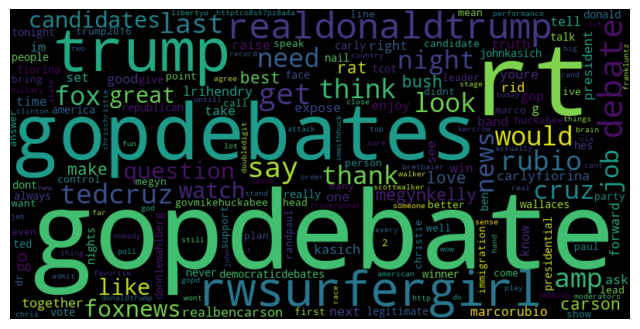

In [24]:
# Word cloud for positive sentiment
wordcloud = WordCloud(width=800, height=400).generate_from_frequencies(freq_dist_pos_sent)
plt.figure(figsize=(8, 5))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

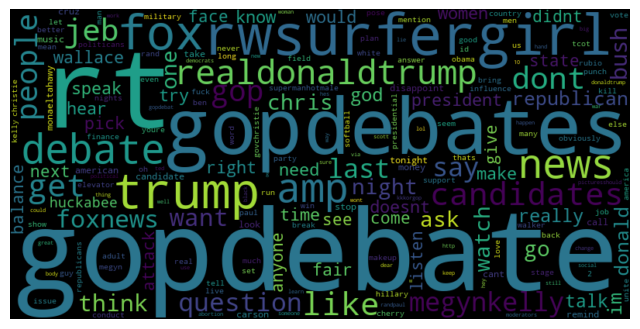

In [25]:
# Word cloud for negative sentiment
wordcloud = WordCloud(width=800, height=400).generate_from_frequencies(freq_dist_neg_sent)
plt.figure(figsize=(8, 5))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

### 6. Convert Text to Features Using TF-IDF

#### TF-IDF (Term Frequency-Inverse Document Frequency): Measures the importance of a word in relation to the entire dataset.

In [26]:
sentiment_text_df.sample()

,sentiment,text,text_an,text_an_tl,text_an_tl_sw,text_an_tl_sw_lem,text_an_tl_sw_lem_str
8408,Negative,"RT @SupermanHotMale: This is why I don't watch Fox News, they're all assholes #GopDebates",RT SupermanHotMale This is why I dont watch Fox News theyre all assholes GopDebates,"[rt, supermanhotmale, this, is, why, i, dont, watch, fox, news, theyre, all, assholes, gopdebates]","[rt, supermanhotmale, dont, watch, fox, news, theyre, assholes, gopdebates]","[rt, supermanhotmale, dont, watch, fox, news, theyre, assholes, gopdebates]",rt supermanhotmale dont watch fox news theyre assholes gopdebates


In [27]:
from sklearn.feature_extraction.text import TfidfVectorizer

# Initialize TF-IDF vectorizer
vectorizer = TfidfVectorizer(max_features=5000, stop_words='english')

# Apply vectorizer transform on text
tfidf_matrix = vectorizer.fit_transform(sentiment_text_df['text_an_tl_sw_lem_str'])

# Convert to dataframe
feature_names = vectorizer.get_feature_names_out()
tfidf_df = pd.DataFrame(tfidf_matrix.todense(), columns=feature_names)

tfidf_df

,10,100,100000,1000s,100s,10th,11,12,13,14,...,zigzagoonsquad,zinger,zingers,zoearcher,zombiereagan,zombies,zone,zonkerpa,zoomph,zzcrane
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13866,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
13867,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
13868,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
13869,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [28]:
tfidf_df[:1].values.tolist()
# .transpose().sample(20)

[[0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,

### 7 Train a Sentiment Classification Model

In [29]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, accuracy_score

# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(sentiment_text_df['text_an_tl_sw_lem_str'], sentiment_text_df['sentiment'], test_size=0.2, random_state=42)

# Convert text to TF-IDF features
vectorizer = TfidfVectorizer()
X_train_tfidf = vectorizer.fit_transform(X_train)
X_test_tfidf = vectorizer.transform(X_test)

# Train a Logistic Regression model
model = LogisticRegression()
model.fit(X_train_tfidf, y_train)

LogisticRegression()

### 8 Test the Model on New Messages

In [30]:
# Make predictions
y_pred = model.predict(X_test_tfidf)
y_pred

array(['Negative', 'Neutral', 'Negative', ..., 'Negative', 'Negative',
       'Negative'], dtype=object)

In [31]:
# Evaluate the model
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

Accuracy: 0.6944144144144144

Classification Report:
               precision    recall  f1-score   support

    Negative       0.73      0.90      0.81      1722
     Neutral       0.52      0.30      0.38       612
    Positive       0.65      0.43      0.52       441

    accuracy                           0.69      2775
   macro avg       0.63      0.54      0.57      2775
weighted avg       0.67      0.69      0.67      2775



In [32]:
### IGNORE

In [33]:
# new_test_tweet = 'Donald Trump is begging Zelenskyy to sign the rare earth minerals deal on his sad little social media platform.\
# Who else thinks Zelenskyy should tell Donald to shove it?\
# 🙋‍♀️'

# new_test_tweet

In [34]:
# new_test_tweet_an = re.sub(r'[^a-zA-Z0-9 ]', '', new_test_tweet)
# new_test_tweet_an_tl = word_tokenize(new_test_tweet_an.lower())
# new_test_tweet_an_tl_sw = apply_stop_words(new_test_tweet_an_tl)
# new_test_tweet_an_tl_sw_lem = apply_lemmatization(new_test_tweet_an_tl_sw)
# new_test_tweet_an_tl_sw_lem_str = ' '.join(new_test_tweet_an_tl_sw_lem)
# new_test_tweet_an_tl_sw_lem_str